In [2]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

import datetime as dt

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [6]:
# Import the sqlalchemy extract function.
from sqlalchemy import extract

# 1. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_results = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==6)

In [11]:
# 2. Convert the June temperatures to a list.
june_results = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==6).all()
print(june_results)

[('2010-06-01', 78.0), ('2010-06-02', 76.0), ('2010-06-03', 78.0), ('2010-06-04', 76.0), ('2010-06-05', 77.0), ('2010-06-06', 78.0), ('2010-06-07', 77.0), ('2010-06-08', 78.0), ('2010-06-09', 78.0), ('2010-06-10', 79.0), ('2010-06-11', 78.0), ('2010-06-12', 78.0), ('2010-06-13', 78.0), ('2010-06-14', 77.0), ('2010-06-15', 78.0), ('2010-06-16', 78.0), ('2010-06-17', 77.0), ('2010-06-18', 77.0), ('2010-06-19', 82.0), ('2010-06-20', 78.0), ('2010-06-21', 78.0), ('2010-06-22', 78.0), ('2010-06-23', 78.0), ('2010-06-24', 78.0), ('2010-06-25', 77.0), ('2010-06-26', 76.0), ('2010-06-27', 78.0), ('2010-06-28', 78.0), ('2010-06-29', 78.0), ('2010-06-30', 78.0), ('2011-06-01', 77.0), ('2011-06-02', 78.0), ('2011-06-03', 73.0), ('2011-06-04', 70.0), ('2011-06-05', 76.0), ('2011-06-06', 77.0), ('2011-06-07', 77.0), ('2011-06-08', 77.0), ('2011-06-09', 77.0), ('2011-06-10', 78.0), ('2011-06-11', 77.0), ('2011-06-12', 77.0), ('2011-06-13', 78.0), ('2011-06-14', 78.0), ('2011-06-15', 77.0), ('2011-06

In [13]:
# 3. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june_results, columns=['date', 'June Temps'])

In [14]:
# 4. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [15]:
# 5. Return to your challenge instructions to compare your summary statistics

## D2: Determine the Summary Statistics for December

In [16]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_results = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==12)
print(dec_results)

SELECT measurement.date AS measurement_date, measurement.tobs AS measurement_tobs 
FROM measurement 
WHERE CAST(STRFTIME('%m', measurement.date) AS INTEGER) = ?


In [20]:
# 7. Convert the December temperatures to a list.
dec_results = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==12).all()
print(dec_results)

[('2010-12-01', 76.0), ('2010-12-03', 74.0), ('2010-12-04', 74.0), ('2010-12-06', 64.0), ('2010-12-07', 64.0), ('2010-12-08', 67.0), ('2010-12-09', 77.0), ('2010-12-10', 66.0), ('2010-12-11', 69.0), ('2010-12-12', 68.0), ('2010-12-13', 68.0), ('2010-12-14', 71.0), ('2010-12-15', 74.0), ('2010-12-16', 67.0), ('2010-12-17', 66.0), ('2010-12-18', 69.0), ('2010-12-19', 71.0), ('2010-12-23', 70.0), ('2010-12-24', 70.0), ('2010-12-26', 74.0), ('2010-12-27', 74.0), ('2010-12-28', 71.0), ('2010-12-29', 75.0), ('2010-12-30', 75.0), ('2010-12-31', 72.0), ('2011-12-01', 69.0), ('2011-12-02', 68.0), ('2011-12-03', 73.0), ('2011-12-04', 74.0), ('2011-12-05', 73.0), ('2011-12-06', 73.0), ('2011-12-07', 73.0), ('2011-12-08', 73.0), ('2011-12-09', 71.0), ('2011-12-10', 73.0), ('2011-12-11', 73.0), ('2011-12-12', 77.0), ('2011-12-13', 72.0), ('2011-12-14', 71.0), ('2011-12-15', 73.0), ('2011-12-16', 70.0), ('2011-12-17', 73.0), ('2011-12-18', 69.0), ('2011-12-19', 74.0), ('2011-12-20', 72.0), ('2011-12

In [21]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(dec_results, columns=['date', 'Dec Temps'])
dec_df

,date,Dec Temps
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


In [22]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,Dec Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [23]:
# 10. Return to your challenge instructions to compare your summary statistics

## D3: Perform two additional queries to gather more weather data for June and December

In [5]:
# Import the sqlalchemy extract function.
from sqlalchemy import extract

# 1. Write a query that filters the Measurement table to retrieve the precipitation for the month of June. 
june_results_prec = session.query(Measurement.date, Measurement.prcp).\
    filter(extract('month', Measurement.date)==6)

In [6]:
# 2. Convert the June precipitation to a list.
june_results_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(extract('month', Measurement.date)==6).all()
print(june_results_prcp)

[('2010-06-01', 0.0), ('2010-06-02', 0.01), ('2010-06-03', 0.0), ('2010-06-04', 0.0), ('2010-06-05', 0.0), ('2010-06-06', 0.0), ('2010-06-07', 0.0), ('2010-06-08', 0.0), ('2010-06-09', 0.0), ('2010-06-10', 0.0), ('2010-06-11', 0.0), ('2010-06-12', 0.0), ('2010-06-13', 0.0), ('2010-06-14', 0.0), ('2010-06-15', 0.0), ('2010-06-16', 0.0), ('2010-06-17', 0.0), ('2010-06-18', 0.0), ('2010-06-19', 0.0), ('2010-06-20', 0.0), ('2010-06-21', 0.0), ('2010-06-22', 0.0), ('2010-06-23', 0.0), ('2010-06-24', 0.0), ('2010-06-25', 0.0), ('2010-06-26', 0.02), ('2010-06-27', 0.0), ('2010-06-28', 0.0), ('2010-06-29', 0.0), ('2010-06-30', 0.0), ('2011-06-01', 0.07), ('2011-06-02', 0.0), ('2011-06-03', 0.56), ('2011-06-04', 0.89), ('2011-06-05', 0.0), ('2011-06-06', 0.0), ('2011-06-07', 0.0), ('2011-06-08', 0.03), ('2011-06-09', 0.01), ('2011-06-10', 0.0), ('2011-06-11', 0.0), ('2011-06-12', 0.0), ('2011-06-13', 0.0), ('2011-06-14', 0.0), ('2011-06-15', 0.0), ('2011-06-17', 0.0), ('2011-06-18', 0.0), ('201

In [7]:
# 3. Create a DataFrame from the list of precipitation for the month of June. 
june_df_prcp = pd.DataFrame(june_results_prcp, columns=['date', 'June Prcp'])

In [8]:
# 4. Calculate and print out the summary statistics for the June precipitation DataFrame.
june_df_prcp.describe()

,June Prcp
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [9]:
# Sort the dataframe by date
june_df_prcp = june_df_prcp.sort_index()
print(june_df_prcp.to_string(index=False))

      date  June Prcp
2010-06-01       0.00
2010-06-02       0.01
2010-06-03       0.00
2010-06-04       0.00
2010-06-05       0.00
2010-06-06       0.00
2010-06-07       0.00
2010-06-08       0.00
2010-06-09       0.00
2010-06-10       0.00
2010-06-11       0.00
2010-06-12       0.00
2010-06-13       0.00
2010-06-14       0.00
2010-06-15       0.00
2010-06-16       0.00
2010-06-17       0.00
2010-06-18       0.00
2010-06-19       0.00
2010-06-20       0.00
2010-06-21       0.00
2010-06-22       0.00
2010-06-23       0.00
2010-06-24       0.00
2010-06-25       0.00
2010-06-26       0.02
2010-06-27       0.00
2010-06-28       0.00
2010-06-29       0.00
2010-06-30       0.00
2011-06-01       0.07
2011-06-02       0.00
2011-06-03       0.56
2011-06-04       0.89
2011-06-05       0.00
2011-06-06       0.00
2011-06-07       0.00
2011-06-08       0.03
2011-06-09       0.01
2011-06-10       0.00
2011-06-11       0.00
2011-06-12       0.00
2011-06-13       0.00
2011-06-14       0.00
2011-06-15

<AxesSubplot:>

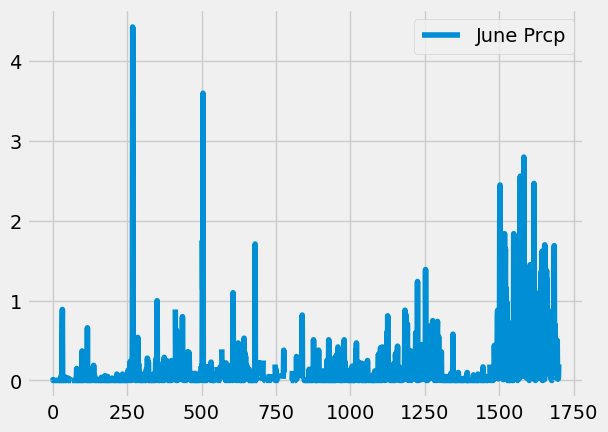

In [10]:
# Use Pandas Plotting with Matplotlib to plot the data
june_df_prcp.plot()

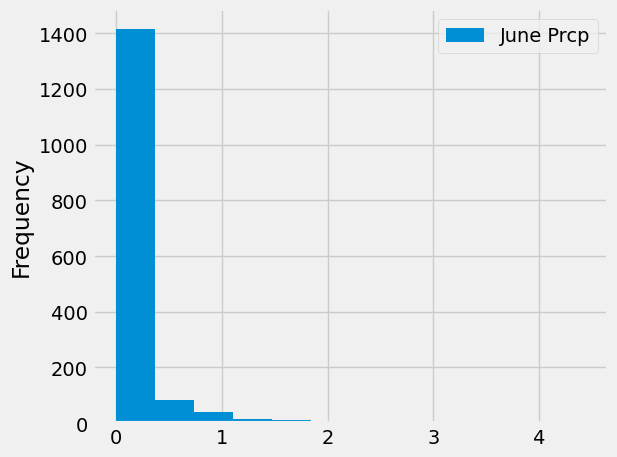

In [16]:
# Create a histogram; a range of data that is separated into different bins (each rectangular column in the plot shown below)
june_df_prcp.plot.hist(bins=12)
plt.tight_layout()

In [38]:
# Import the sqlalchemy extract function.
from sqlalchemy import extract

# 1. Write a query that filters the Measurement table to retrieve the precipitation for the month of December. 
dec_results_prec = session.query(Measurement.date, Measurement.prcp).\
    filter(extract('month', Measurement.date)==12)

In [39]:
# 2. Convert the December precipitation to a list.
dec_results_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(extract('month', Measurement.date)==12).all()
print(dec_results_prcp)

[('2010-12-01', 0.04), ('2010-12-03', 0.0), ('2010-12-04', 0.0), ('2010-12-06', 0.0), ('2010-12-07', 0.0), ('2010-12-08', 0.0), ('2010-12-09', 0.0), ('2010-12-10', 1.58), ('2010-12-11', 0.77), ('2010-12-12', 0.0), ('2010-12-13', 0.0), ('2010-12-14', 0.0), ('2010-12-15', 0.0), ('2010-12-16', 0.0), ('2010-12-17', 0.0), ('2010-12-18', 0.0), ('2010-12-19', 1.4), ('2010-12-23', 0.0), ('2010-12-24', 0.0), ('2010-12-26', None), ('2010-12-27', 0.13), ('2010-12-28', 0.55), ('2010-12-29', 0.06), ('2010-12-30', 0.01), ('2010-12-31', 0.0), ('2011-12-01', 0.03), ('2011-12-02', 0.08), ('2011-12-03', 0.0), ('2011-12-04', 0.0), ('2011-12-05', 0.0), ('2011-12-06', 0.0), ('2011-12-07', 0.0), ('2011-12-08', 0.0), ('2011-12-09', 0.13), ('2011-12-10', 0.07), ('2011-12-11', 0.07), ('2011-12-12', 0.08), ('2011-12-13', 0.4), ('2011-12-14', 0.7), ('2011-12-15', 0.0), ('2011-12-16', 0.01), ('2011-12-17', 0.07), ('2011-12-18', 0.02), ('2011-12-19', 0.15), ('2011-12-20', 0.02), ('2011-12-21', 0.18), ('2011-12-22'

In [40]:
# 3. Create a DataFrame from the list of temperatures for the month of June. 
dec_df_prcp = pd.DataFrame(dec_results_prcp, columns=['date', 'Dec Prcp'])

In [41]:
# 4. Calculate and print out the summary statistics for the June temperature DataFrame.
dec_df_prcp.describe()

,Dec Prcp
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


In [43]:
# Sort the dataframe by date
dec_df_prcp = dec_df_prcp.sort_index()
print(dec_df_prcp.to_string(index=False))

      date  Dec Prcp
2010-12-01      0.04
2010-12-03      0.00
2010-12-04      0.00
2010-12-06      0.00
2010-12-07      0.00
2010-12-08      0.00
2010-12-09      0.00
2010-12-10      1.58
2010-12-11      0.77
2010-12-12      0.00
2010-12-13      0.00
2010-12-14      0.00
2010-12-15      0.00
2010-12-16      0.00
2010-12-17      0.00
2010-12-18      0.00
2010-12-19      1.40
2010-12-23      0.00
2010-12-24      0.00
2010-12-26       NaN
2010-12-27      0.13
2010-12-28      0.55
2010-12-29      0.06
2010-12-30      0.01
2010-12-31      0.00
2011-12-01      0.03
2011-12-02      0.08
2011-12-03      0.00
2011-12-04      0.00
2011-12-05      0.00
2011-12-06      0.00
2011-12-07      0.00
2011-12-08      0.00
2011-12-09      0.13
2011-12-10      0.07
2011-12-11      0.07
2011-12-12      0.08
2011-12-13      0.40
2011-12-14      0.70
2011-12-15      0.00
2011-12-16      0.01
2011-12-17      0.07
2011-12-18      0.02
2011-12-19      0.15
2011-12-20      0.02
2011-12-21      0.18
2011-12-22   

<AxesSubplot:>

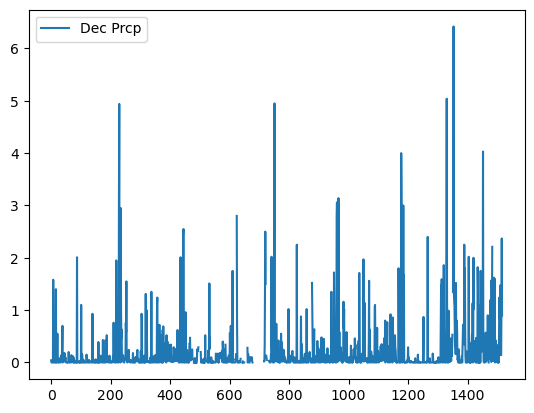

In [44]:
# Use Pandas Plotting with Matplotlib to plot the data
dec_df_prcp.plot()

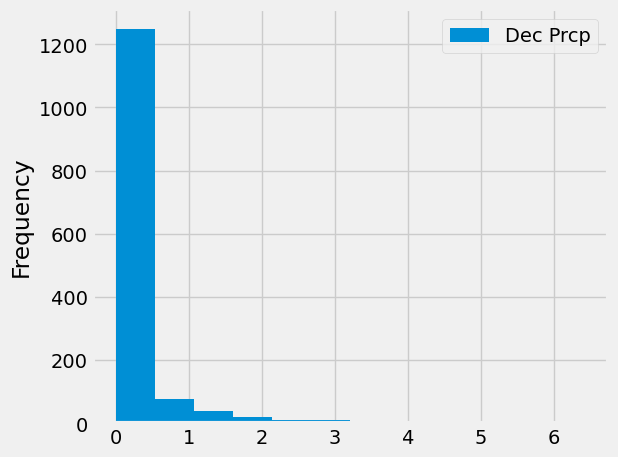

In [47]:
# Create a histogram; a range of data that is separated into different bins (each rectangular column in the plot shown below)
dec_df_prcp.plot.hist(bins=12)
plt.tight_layout()